In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('purchase_table.xls')
df['reg_dttm'] = df['reg_dttm'].dt.strftime('%Y-%m')
df['birth_dt'] = df['birth_dt'].dt.strftime('%Y')
df['age'] = 2019 - df['birth_dt'].astype(int)
df.head(10)

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,age
0,820519,1990,2019-01,NaN,NaT,NaN,29
1,820521,1970,2019-01,NaN,NaT,NaN,49
2,820523,1991,2019-01,1.204926e+09,2019-02-12,500.0,28
3,820526,1985,2019-01,NaN,NaT,NaN,34
4,820544,1991,2019-01,NaN,NaT,NaN,28
5,820552,1999,2019-01,NaN,NaT,NaN,20
6,820561,1993,2019-01,1.205778e+09,2019-02-13,500.0,26
7,820562,1981,2019-01,NaN,NaT,NaN,38
8,820588,1984,2019-01,NaN,NaT,NaN,35
9,820598,1980,2019-01,NaN,NaT,NaN,39


In [3]:
df[['reg_dttm']].min()

reg_dttm    2019-01
dtype: object

In [4]:
df[['reg_dttm']].max()

reg_dttm    2019-04
dtype: object

In [5]:
df_jan = df[df.reg_dttm == '2019-01']
print(df_jan.head(10))
print(df_jan[['reg_dttm']].min())
print(df_jan[['reg_dttm']].max())

   client_id birth_dt reg_dttm   purchase_id purchase_dt  purchase_amt  age
0     820519     1990  2019-01           NaN         NaT           NaN   29
1     820521     1970  2019-01           NaN         NaT           NaN   49
2     820523     1991  2019-01  1.204926e+09  2019-02-12         500.0   28
3     820526     1985  2019-01           NaN         NaT           NaN   34
4     820544     1991  2019-01           NaN         NaT           NaN   28
5     820552     1999  2019-01           NaN         NaT           NaN   20
6     820561     1993  2019-01  1.205778e+09  2019-02-13         500.0   26
7     820562     1981  2019-01           NaN         NaT           NaN   38
8     820588     1984  2019-01           NaN         NaT           NaN   35
9     820598     1980  2019-01           NaN         NaT           NaN   39
reg_dttm    2019-01
dtype: object
reg_dttm    2019-01
dtype: object


In [6]:
df1_jan = df_jan.groupby(['client_id','age'], as_index=False)[['reg_dttm']].count()
df2_jan = df1_jan.groupby(['age'], as_index=False)[['client_id']].count()
df2_jan.rename(columns={'client_id': 'count_jan'}, inplace=True)

list_age = ['18-24', '25-34', '35-44', '45-54', '55+']
list_count_jan = []
list_count_jan.append(df2_jan[(df2_jan.age >= 18)&(df2_jan.age <= 24)]['count_jan'].sum())
list_count_jan.append(df2_jan[(df2_jan.age >= 25)&(df2_jan.age <= 34)]['count_jan'].sum())
list_count_jan.append(df2_jan[(df2_jan.age >= 35)&(df2_jan.age <= 44)]['count_jan'].sum())
list_count_jan.append(df2_jan[(df2_jan.age >= 45)&(df2_jan.age <= 54)]['count_jan'].sum())
list_count_jan.append(df2_jan[(df2_jan.age >= 55)]['count_jan'].sum())
data = pd.DataFrame({'Возраст': list_age, 'Число клиентов янв': list_count_jan})
data

,Возраст,Число клиентов янв
0,18-24,206
1,25-34,214
2,35-44,106
3,45-54,50
4,55+,25


In [7]:
df_feb = df[df.reg_dttm <= '2019-02']
print(df_feb.head(10))
print(df_feb[['reg_dttm']].min())
print(df_feb[['reg_dttm']].max())

   client_id birth_dt reg_dttm   purchase_id purchase_dt  purchase_amt  age
0     820519     1990  2019-01           NaN         NaT           NaN   29
1     820521     1970  2019-01           NaN         NaT           NaN   49
2     820523     1991  2019-01  1.204926e+09  2019-02-12         500.0   28
3     820526     1985  2019-01           NaN         NaT           NaN   34
4     820544     1991  2019-01           NaN         NaT           NaN   28
5     820552     1999  2019-01           NaN         NaT           NaN   20
6     820561     1993  2019-01  1.205778e+09  2019-02-13         500.0   26
7     820562     1981  2019-01           NaN         NaT           NaN   38
8     820588     1984  2019-01           NaN         NaT           NaN   35
9     820598     1980  2019-01           NaN         NaT           NaN   39
reg_dttm    2019-01
dtype: object
reg_dttm    2019-02
dtype: object


In [8]:
df1_feb = df_feb.groupby(['client_id','age'], as_index=False)[['reg_dttm']].count()
df2_feb = df1_feb.groupby(['age'], as_index=False)[['client_id']].count()
df2_feb.rename(columns={'client_id': 'count_feb'}, inplace=True)

list_age = ['18-24', '25-34', '35-44', '45-54', '55+']
list_count_feb = []
list_count_feb.append(df2_feb[(df2_feb.age >= 18)&(df2_feb.age <= 24)]['count_feb'].sum())
list_count_feb.append(df2_feb[(df2_feb.age >= 25)&(df2_feb.age <= 34)]['count_feb'].sum())
list_count_feb.append(df2_feb[(df2_feb.age >= 35)&(df2_feb.age <= 44)]['count_feb'].sum())
list_count_feb.append(df2_feb[(df2_feb.age >= 45)&(df2_feb.age <= 54)]['count_feb'].sum())
list_count_feb.append(df2_feb[(df2_feb.age >= 55)]['count_feb'].sum())
data['Число клиентов фев'] = list_count_feb
#data_feb = pd.DataFrame({'Возраст': list_age, 'Число клиентов': list_count_feb})
#data_feb
data

,Возраст,Число клиентов янв,Число клиентов фев
0,18-24,206,572
1,25-34,214,446
2,35-44,106,227
3,45-54,50,126
4,55+,25,50


In [9]:
df_mar = df[df.reg_dttm <= '2019-03']
print(df_mar.head(10))
print(df_mar[['reg_dttm']].min())
print(df_mar[['reg_dttm']].max())

   client_id birth_dt reg_dttm   purchase_id purchase_dt  purchase_amt  age
0     820519     1990  2019-01           NaN         NaT           NaN   29
1     820521     1970  2019-01           NaN         NaT           NaN   49
2     820523     1991  2019-01  1.204926e+09  2019-02-12         500.0   28
3     820526     1985  2019-01           NaN         NaT           NaN   34
4     820544     1991  2019-01           NaN         NaT           NaN   28
5     820552     1999  2019-01           NaN         NaT           NaN   20
6     820561     1993  2019-01  1.205778e+09  2019-02-13         500.0   26
7     820562     1981  2019-01           NaN         NaT           NaN   38
8     820588     1984  2019-01           NaN         NaT           NaN   35
9     820598     1980  2019-01           NaN         NaT           NaN   39
reg_dttm    2019-01
dtype: object
reg_dttm    2019-03
dtype: object


In [10]:
df1_mar = df_mar.groupby(['client_id','age'], as_index=False)[['reg_dttm']].count()
df2_mar = df1_mar.groupby(['age'], as_index=False)[['client_id']].count()
df2_mar.rename(columns={'client_id': 'count_mar'}, inplace=True)

list_age = ['18-24', '25-34', '35-44', '45-54', '55+']
list_count_mar = []
list_count_mar.append(df2_mar[(df2_mar.age >= 18)&(df2_mar.age <= 24)]['count_mar'].sum())
list_count_mar.append(df2_mar[(df2_mar.age >= 25)&(df2_mar.age <= 34)]['count_mar'].sum())
list_count_mar.append(df2_mar[(df2_mar.age >= 35)&(df2_mar.age <= 44)]['count_mar'].sum())
list_count_mar.append(df2_mar[(df2_mar.age >= 45)&(df2_mar.age <= 54)]['count_mar'].sum())
list_count_mar.append(df2_mar[(df2_mar.age >= 55)]['count_mar'].sum())
data['Число клиентов мар'] = list_count_mar
#data_mar = pd.DataFrame({'Возраст': list_age, 'Число клиентов': list_count_mar})
#data_mar
data

,Возраст,Число клиентов янв,Число клиентов фев,Число клиентов мар
0,18-24,206,572,877
1,25-34,214,446,643
2,35-44,106,227,302
3,45-54,50,126,160
4,55+,25,50,66


In [11]:
'''
df_apr = df[df.reg_dttm == '2019-04']
print(df_apr.head(10))
print(df_apr[['reg_dttm']].min())
print(df_apr[['reg_dttm']].max())
'''

"\ndf_apr = df[df.reg_dttm == '2019-04']\nprint(df_apr.head(10))\nprint(df_apr[['reg_dttm']].min())\nprint(df_apr[['reg_dttm']].max())\n"

In [12]:
"""
df1_apr = df_apr.groupby(['client_id','age'], as_index=False)[['reg_dttm']].count()
df2_apr = df1_apr.groupby(['age'], as_index=False)[['client_id']].count()
df2_apr.rename(columns={'client_id': 'count_apr'}, inplace=True)

list_age = ['18-24', '25-34', '35-44', '45-54', '55+']
list_count_apr = []
list_count_apr.append(df2_apr[(df2_apr.age >= 18)&(df2_apr.age <= 24)]['count_apr'].sum())
list_count_apr.append(df2_apr[(df2_apr.age >= 25)&(df2_apr.age <= 34)]['count_apr'].sum())
list_count_apr.append(df2_apr[(df2_apr.age >= 35)&(df2_apr.age <= 44)]['count_apr'].sum())
list_count_apr.append(df2_apr[(df2_apr.age >= 45)&(df2_apr.age <= 54)]['count_apr'].sum())
list_count_apr.append(df2_apr[(df2_apr.age >= 55)]['count_apr'].sum())
data_apr = pd.DataFrame({'Возраст': list_age, 'Число клиентов': list_count_apr})
data_apr
"""

"\ndf1_apr = df_apr.groupby(['client_id','age'], as_index=False)[['reg_dttm']].count()\ndf2_apr = df1_apr.groupby(['age'], as_index=False)[['client_id']].count()\ndf2_apr.rename(columns={'client_id': 'count_apr'}, inplace=True)\n\nlist_age = ['18-24', '25-34', '35-44', '45-54', '55+']\nlist_count_apr = []\nlist_count_apr.append(df2_apr[(df2_apr.age >= 18)&(df2_apr.age <= 24)]['count_apr'].sum())\nlist_count_apr.append(df2_apr[(df2_apr.age >= 25)&(df2_apr.age <= 34)]['count_apr'].sum())\nlist_count_apr.append(df2_apr[(df2_apr.age >= 35)&(df2_apr.age <= 44)]['count_apr'].sum())\nlist_count_apr.append(df2_apr[(df2_apr.age >= 45)&(df2_apr.age <= 54)]['count_apr'].sum())\nlist_count_apr.append(df2_apr[(df2_apr.age >= 55)]['count_apr'].sum())\ndata_apr = pd.DataFrame({'Возраст': list_age, 'Число клиентов': list_count_apr})\ndata_apr\n"

In [13]:
data

,Возраст,Число клиентов янв,Число клиентов фев,Число клиентов мар
0,18-24,206,572,877
1,25-34,214,446,643
2,35-44,106,227,302
3,45-54,50,126,160
4,55+,25,50,66


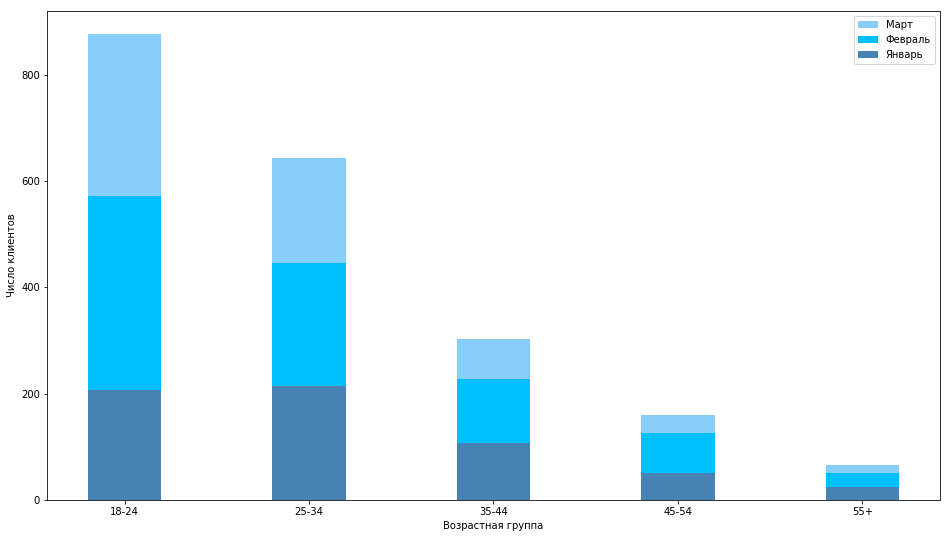

In [21]:
plt.figure(figsize = (16,9))

plt.bar(data['Возраст'] , data['Число клиентов мар'], color = 'lightskyblue', label = 'Март', width=0.4,
        align='center')
plt.bar(data['Возраст'] , data['Число клиентов фев'], color = 'deepskyblue', label = 'Февраль', width=0.4,
        align='center')
plt.bar(data['Возраст'] , data['Число клиентов янв'], color = 'steelblue', label = 'Январь', width=0.4,
        align='center')

plt.xlabel('Возрастная группа')
plt.ylabel('Число клиентов')

plt.legend()